In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset=pd.read_csv("Market.csv")

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income
(INR)     200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [175]:
dataset.drop(['CustomerID'],axis=1,inplace=True)

dataset.isnull().sum()

Gender                    0
Age                       0
Annual Income\n(INR)      0
Spending Score (1-100)    0
dtype: int64

In [176]:
dataset=dataset.rename(columns={'Annual Income\n(INR)':'Income',
                                'Spending Score (1-100)':'Score'})

In [177]:
dataset

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [178]:
dataset=pd.get_dummies(dataset,drop_first=True)
dataset

,Age,Income,Score,Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


**Exploratory Data Analysis** : Searching for patterns in the Dataset and finding insights

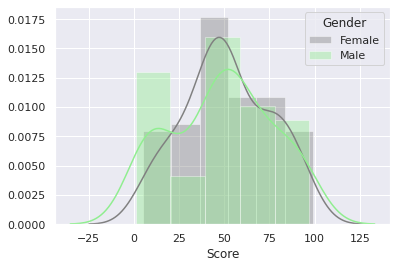

In [179]:
sns.set_style('darkgrid')
sns.set()
Female = dataset[dataset['Gender_Male'] == 0]
Male = dataset[dataset['Gender_Male'] == 1]
sns.distplot(Female.Score,label='Female',color ='grey')
sns.distplot(Male.Score,label='Male',color = 'lightgreen')
plt.legend(title='Gender',loc='best')

Inference - The Market should be more oriented towards Females , as the Number of Females visiting the Market is more, and their Score is more spread-out than Males.

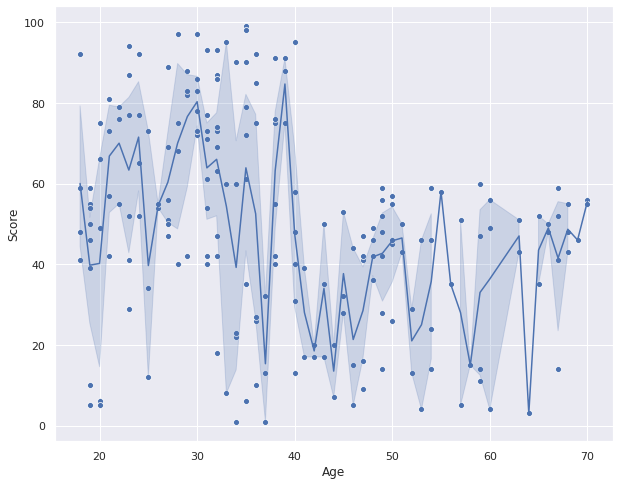

In [180]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.set_palette('YlGnBu')
sns.axes_style("whitegrid")
sns.scatterplot(x='Age',y='Score',data=dataset,ax=ax)
sns.lineplot(x='Age',y='Score',data=dataset,markers="o",ax=ax)

Inference: To promote their sales, the mall could target Customers in their late 30s and early 40s. Customers who are older in age tend to spend less.   

**Model Building** - Even though this is a Clustering Analysis Problem we will use PCA , to reduce the dimensionality of the dataset so that we can plot our results.


In [181]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
pca.fit(dataset)
X=pca.transform(dataset)

**Hierarchial Clustering** - We will use Dendograms to visualize the Agglomerative Clustering.

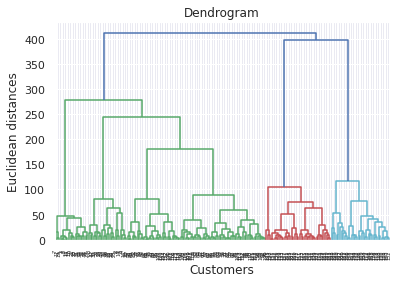

In [182]:
import scipy.cluster.hierarchy as sch
plt.figure
dendrogram = sch.dendrogram(sch.linkage(dataset, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

Inference - From the Dendogram it can be easily seen that the 5 should be the optimum number of Clusters in this Dataset.

In [183]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
dataset['label_hc'] = hc.fit_predict(dataset)

Visulaising the Hierarchial Clustering

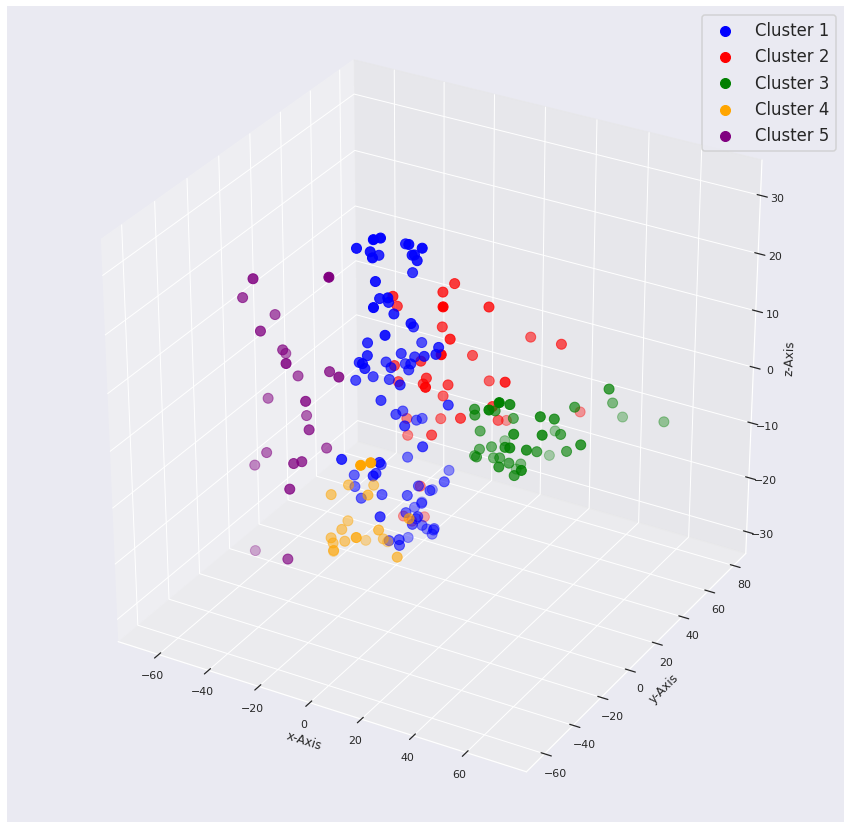

In [184]:
df=pd.DataFrame(dataset)
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
ax.scatter(X[:,0][df.label_hc == 0], X[:,1][df.label_hc == 0], X[:,2][df.label_hc == 0], c='blue',s=100,label='Cluster 1')
ax.scatter(X[:,0][df.label_hc == 1], X[:,1][df.label_hc == 1], X[:,2][df.label_hc == 1], c='red', s=100,label='Cluster 2')
ax.scatter(X[:,0][df.label_hc == 2], X[:,1][df.label_hc == 2], X[:,2][df.label_hc == 2], c='green',s=100,label='Cluster 3')
ax.scatter(X[:,0][df.label_hc == 3], X[:,1][df.label_hc == 3], X[:,2][df.label_hc == 3], c='orange',s=100,label='Cluster 4')
ax.scatter(X[:,0][df.label_hc == 4], X[:,1][df.label_hc == 4], X[:,2][df.label_hc == 4], c='purple',s=100,label='Cluster 5')
sns.set_style('darkgrid')
sns.set_context("talk")
plt.xlabel("x-Axis")
plt.ylabel("y-Axis")
ax.set_zlabel("z-Axis")
plt.legend()
plt.show()


**K-Means Clustering** - We will use elbow method to find the optimal no. of clusters

In [185]:
dataset.shape

(200, 5)

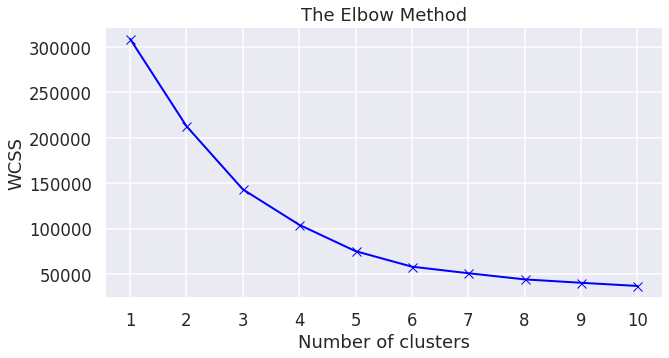

In [186]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset.iloc[:,:-1])
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5)) 
plt.plot(range(1, 11), wcss,linewidth=2, color="Blue", marker ="x")
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1,11,1))
plt.ylabel('WCSS')
plt.show()

Inference : The optimal Clusters for this dataset according to **The Elbow Method** is 5.

In [187]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
dataset['label_kmc'] = kmeans.fit_predict(dataset.iloc[:,:-1])


Visulaising the K-Means Clustering Algorithm :

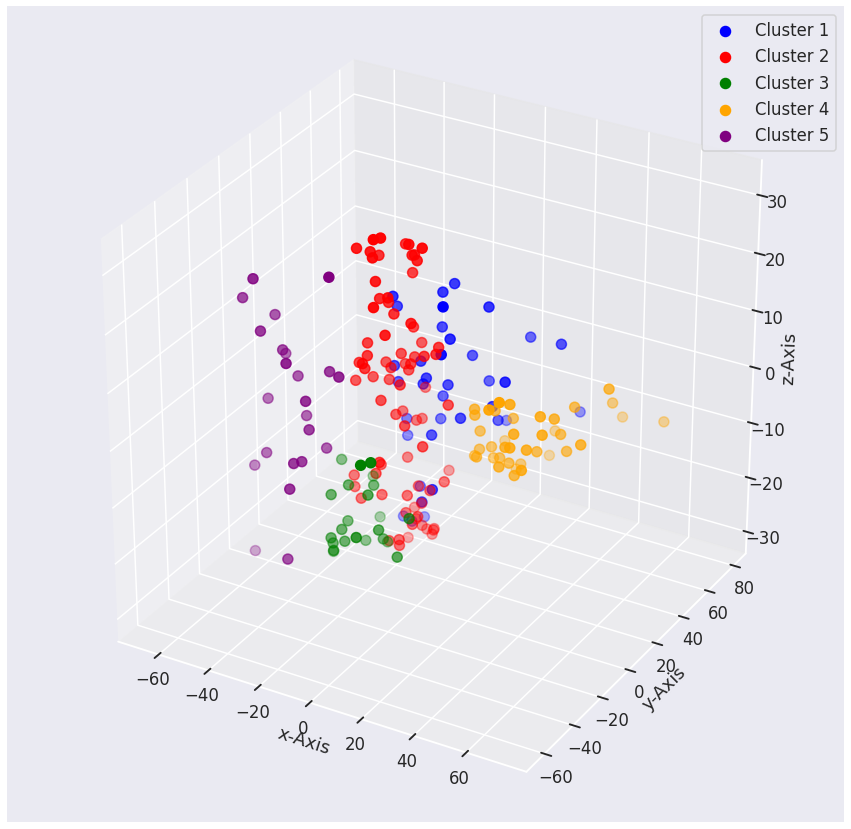

In [188]:
df=pd.DataFrame(dataset)
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
ax.scatter(X[:,0][df.label_kmc == 0], X[:,1][df.label_kmc == 0], X[:,2][df.label_kmc == 0], c='blue',s=100,label='Cluster 1')
ax.scatter(X[:,0][df.label_kmc == 1], X[:,1][df.label_kmc == 1], X[:,2][df.label_kmc == 1], c='red', s=100,label='Cluster 2')
ax.scatter(X[:,0][df.label_kmc == 2], X[:,1][df.label_kmc == 2], X[:,2][df.label_kmc == 2], c='green',s=100,label='Cluster 3')
ax.scatter(X[:,0][df.label_kmc == 3], X[:,1][df.label_kmc == 3], X[:,2][df.label_kmc == 3], c='orange',s=100,label='Cluster 4')
ax.scatter(X[:,0][df.label_kmc == 4], X[:,1][df.label_kmc == 4], X[:,2][df.label_kmc == 4], c='purple',s=100,label='Cluster 5')
sns.set_style('darkgrid')
sns.set_context("talk")
plt.xlabel("x-Axis")
plt.ylabel("y-Axis")
ax.set_zlabel("z-Axis")
plt.legend()
plt.show()

In [189]:
print(dataset.iloc[:,4:])

     label_hc  label_kmc
0           4          4
1           3          2
2           4          4
3           3          2
4           4          4
..        ...        ...
195         2          3
196         1          0
197         2          3
198         1          0
199         2          3

[200 rows x 2 columns]


**Conclusion :** Both the Hierarchial and K-Means found the optimum number of Clusters to be 5. With the Hierarchial Clustering Algorithm, we always end up with the same labels for our data , whereas because of the random initialization the labels might change. Also, even though both these algorithms gave the output as 5 clusters, the labels weren't exactly the same.